# 01 Exploratory

The purpose of this notebook is to investigate the data.

## Project task

Mod 3 project task is to create a model that classifies a water pump as fully functional, in need of repairs, or failed. We are to use the waterpump features (data of installation, who installed, etc) to do this.

## Import libraries and data

In [489]:
# Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Processing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder

# Model selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

# Value imputer
from sklearn.impute import SimpleImputer

# Model creation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Model metrics
from sklearn.metrics import accuracy_score, recall_score, make_scorer, confusion_matrix
%matplotlib inline

In [2]:
# store training features and labels in dataframes
vals = pd.read_csv('../../training_set_values')
labels = pd.read_csv('../../training_set_labels')

In [3]:
vals.head()

,Unnamed: 0,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [4]:
labels.head()

,Unnamed: 0,id,status_group
0,0,69572,functional
1,1,8776,functional
2,2,34310,functional
3,3,67743,non functional
4,4,19728,functional


The data is already split into features and labels, but for initial data exploration I want to combine them into one dataframe.

In [5]:
labels.drop('Unnamed: 0', axis=1, inplace=True)
df = labels.merge(vals, on='id', how='outer')

In [6]:
df.head()

,id,status_group,Unnamed: 0,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,3,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,4,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


Now I can drop the id column and Unnamed since the observations are aligned properly.

In [7]:
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)

In [8]:
df.head()

,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


Now I can begin to investigate the data. First I want to check the shape so I can see how many observations I am working with.

In [9]:
df.shape

(59400, 40)

Almost 60,000 rows, that means I will have a lot of data to train a model with but also enough to accurately test the model. I also need to check datatypes for the features.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 40 columns):
status_group             59400 non-null object
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object


The majority of the data seems to be categorical but I will have to check into that more. Only a select few are inherently numeric. There are a few columns that are missing values, but only scheme_name is missing a lot. Since scheme_managment provides the close to the same information according to the data documentation, I will drop scheme_name.

In [11]:
df.drop('scheme_name', axis=1, inplace=True)

In [12]:
df.isna().sum()

status_group                0
amount_tsh                  0
date_recorded               0
funder                   3635
gps_height                  0
installer                3655
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                371
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting           3334
recorded_by                 0
scheme_management        3877
permit                   3056
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity                    0
quantity_g

'scheme_name' is dropped and now there are only 6 columns missing data. Before I deal with those missing data values I will need to perform a train_test_split to prevent data leakage. For now I am going to explore the available data a little more as is before filling missing values.

In [13]:
df['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

The class 'functional needs repair' is extremely lower than the other two classes. I will have to keep that in mind when creating the model and oversample that class.

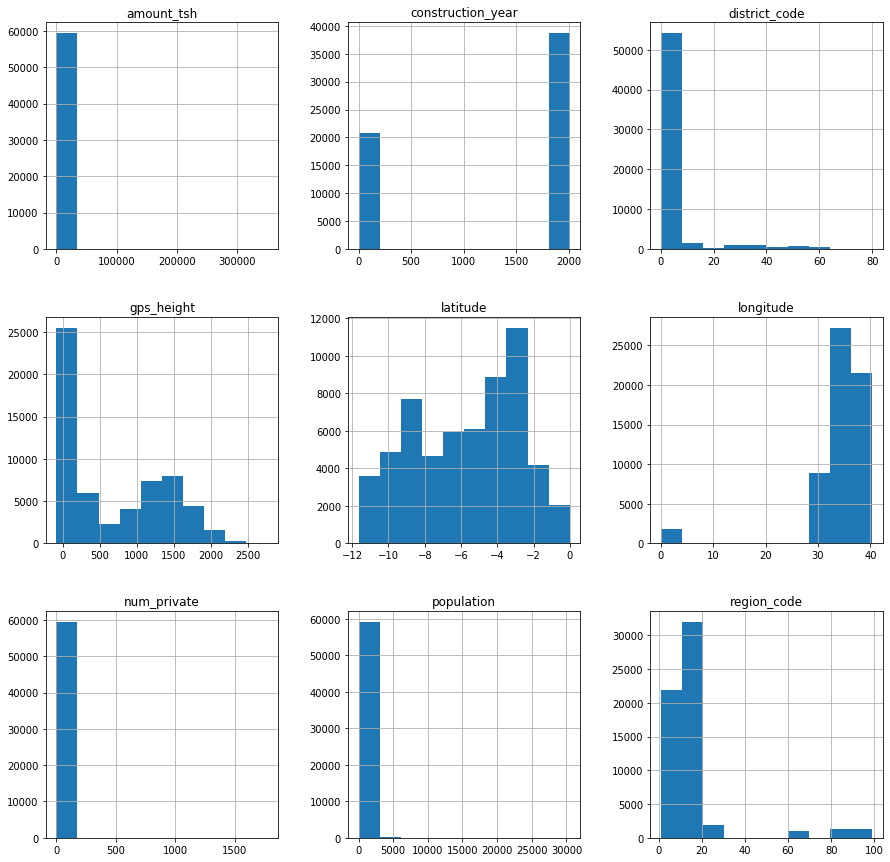

In [14]:
df.hist(figsize=(15,15));

So only nine of the features are actually numeric, all of the other's are objects. I'm curious why the construction_year column has so many low values, it doesn't seem like it should ever have a value of 0. Let's look into that more.

In [15]:
df['construction_year'].value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

Over 20,000 of the construction_year values are 0. That could be an issue when creating the model as those are basically missing values. I wonder how I could impute those. Just a side note for when I fill in the missing values for the other categorical columns, I think it would be beneficial to calculate the percentage of each category in that variable and fill a percentage of the missing values with each percentage of the other categories. I actually want to try that now. I don't want to fill those values yet, but I want to investigate those columns more and determine the best way to fill them when I need to.

### Explore missing values

I'll look first at the 'funder' column

In [46]:
df.isna().sum()['funder']

3635

In [510]:
df['funder'].value_counts()

Government Of Tanzania           9084
Danida                           3114
Hesawa                           2202
Rwssp                            1374
World Bank                       1349
                                 ... 
Tbl                                 1
Comune Di Roma                      1
Afriican Reli                       1
Manyovu Agriculture Institute       1
Madra                               1
Name: funder, Length: 1897, dtype: int64

Considering that out of 59,400 observations, 9,084 are a single category, I could probably just fill the missing values with that, but I want to look at it a little more.

In [102]:
len(df[df['funder'] == 'NaN'])

0

That's interesting, 777 of the funder values are 0. I would imagine 0 to be inplace of the missing values, but that only accounts for 777, what about the other missing values? I'm going to check some of the other columns with missing values and see what is used in those.

In [64]:
df.isna().sum()['installer']

3655

In [65]:
df['installer'].value_counts()

DWE                      17402
Government                1825
RWE                       1206
Commu                     1060
DANIDA                    1050
                         ...  
NDRDP                        1
Quick win/halmashauri        1
john skwese                  1
RC Msufi                     1
Madra                        1
Name: installer, Length: 2145, dtype: int64

In [66]:
len(df[df['installer'] =='0'])

777

Same amount of values equal to 0 in installer as in funder, I wonder if they are the same indices.

In [70]:
df[df['installer'] == '0'].index == df[df['funder'] == '0'].index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

Okay so I wonder if I can assume the same for the other columns missing data. subvillage is only missing 371 so probably not that one, but the other ones should be the same.

In [89]:
len(df[df['permit'] == '0'])

0

The other columns have no values of 0. I'm still curious what the missing value value is, but I will have to leave that for now. I'm curious how many rows have any missing values.

In [97]:
len(df[df.isna().any(axis=1)])

11112

I want to select the index with missing values from funder to see what is the placeholder.

In [98]:
missing_funder = df[df.isna()['funder']]

In [100]:
missing_funder.head()

,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
34,functional,0.0,2011-02-23,NaN,-41,NaN,39.812912,-7.889986,Msikitini Wa Ijumaa,0,...,never pay,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
43,non functional,0.0,2013-01-15,NaN,1642,NaN,34.967789,-4.628921,Mvae Primary,0,...,unknown,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
47,functional,0.0,2011-07-27,NaN,0,NaN,33.540607,-9.172905,Mahakamani,0,...,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
65,non functional,0.0,2013-02-09,NaN,1415,NaN,34.621598,-5.173136,Nyambi,0,...,unknown,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
71,non functional,0.0,2011-03-31,NaN,0,NaN,34.462228,-8.575780,Kwa Manyusi Mlilo,0,...,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


That's strange, when I checked how many observations had 'NaN' for funder it kept coming back 0

I guess it really doesn't matter what the values are I have to replace them nonetheless. I do want to look into a few of the other columns that I think may impact 'status_group' though. It seems like the majority of the columns have upwards of 2000 categories each, I'm going to have to group some of those together in order to do OneHotEncoding.

### Feature exploration

One feature I think will significantly impact the status of the pump is population. The more people using the pump, the more wear and tear it will undergo and the more likely it will need repairs or be failing althogether. This is my intuitive thinking but I'd like to explore this theory more.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb7a6a7710>]],
      dtype=object)

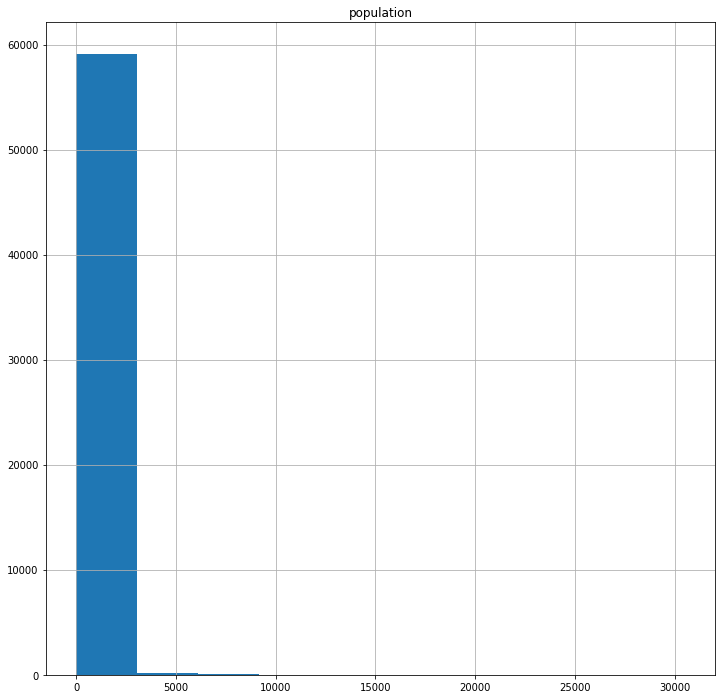

In [113]:
df.hist('population', figsize=(12,12))

In [114]:
df['population'].value_counts()

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64

More than a third of the population values are 0, and nearly half are either 0 or 1, so perhaps the population data won't give too much insight. The 'management' column may be a good one to look at. The quality of water well management should influence the status of the well.

In [115]:
df['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

That's cool this is the first categorical variable I have seen that doesn't have over 1000 categories.

In [116]:
df['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

'management_group' column has even fewer categories but I assume is essentially the same information.

In [117]:
df['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

### Questions

A few questions I have moving forward (more about data science than actual data):
- how to find correlation or supplement measurement for categorical data
- how to group different categories together to allow OneHotEncoding


One thing I have noticed from the data documentation specifically is that a lot of the features give similar information. For example management and management_group both give essentially the same info, management is just a little more specific. But when I get to modeling I won't need that duplicate info. For now I want to continue exploring the individual featueres

In [126]:
df.groupby('status_group').describe()['amount_tsh']

,count,mean,std,min,25%,50%,75%,max
status_group,,,,,,,,
functional,32259.0,461.798235,3889.735284,0.0,0.0,0.0,50.0,350000.0
functional needs repair,4317.0,267.071577,1925.026420,0.0,0.0,0.0,50.0,100000.0
non functional,22824.0,123.481230,1110.120571,0.0,0.0,0.0,0.0,117000.0


The average amount of water available at a given pump is a good indicator of how it is functioning, which makes sense, if a water well is not functioning properly there will be less water available!

In [130]:
df.groupby('status_group').describe()['gps_height']

,count,mean,std,min,25%,50%,75%,max
status_group,,,,,,,,
functional,32259.0,740.131188,724.193683,-90.0,0.0,550.0,1404.0,2628.0
functional needs repair,4317.0,627.607135,648.397850,-51.0,0.0,385.0,1243.0,2770.0
non functional,22824.0,574.464774,642.752316,-59.0,0.0,293.0,1211.0,2627.0


gps_height is the altitude of the well, which I assumes mean how high above sea level. On average it looks like wells at higher sea levels actually function better. I thought it would be the other way around. It's important I keep in mind that the classes in status_group are not well balanced, and that imbalance may impact some of these stats. Also I need to remember to take interactions into account when I start building models.

In [137]:
df['permit'].value_counts()

True     38852
False    17492
Name: permit, dtype: int64

In [143]:
df['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [144]:
df['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [145]:
df['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

Similar to management/management_group and scheme_name/scheme_management, all of the extraction columns give essentially the same information, extraction_type_class gives a very general overview while the other two are more specific.

In [147]:
df['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [148]:
df['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

payment and payment_type are identical so i can drop one of those. I will drop payment_type since payment is easier to type.

In [149]:
df.drop('payment_type', axis=1, inplace=True)

In [150]:
df['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [151]:
df['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [152]:
df['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [153]:
df['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [154]:
df['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

Same as the extraction columns, all three source columns give essentially the same info, source_class is most general and the other two give a little bit more specific information.

In [156]:
df['basin'].value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

I'm curious what the payment types are for the different pump statuses. Is a pump more likely to fail if it is not paid for? I think a barplot would be a good, I want to see how many of each type of water well is in each payment category. I may want to do this for other categories as well such as basin or management, so I am going to write a function to do this.

It would be nice if I could create a dataframe with the index as feature's categories, columns as status_groups and the values being the count of each status_group in each given category of the feature.

In [198]:
df['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [239]:
func_count = {}
repair_count = {}
fail_count = {}
for val in df['payment'].unique():
    func_count[val] = 0
    repair_count[val] = 0
    fail_count[val] = 0
for idx, row in df.iterrows():
    if row['status_group'] == 'functional':
        func_count[row['payment']] += 1
    elif row['status_group'] == 'functional needs repair':
        repair_count[row['payment']] += 1
    elif row['status_group'] == 'non functional':
        fail_count[row['payment']] += 1
func_count

{'pay annually': 2740,
 'never pay': 11379,
 'pay per bucket': 6090,
 'unknown': 3528,
 'pay when scheme fails': 2429,
 'other': 611,
 'pay monthly': 5482}

In [242]:
repair_count

{'pay annually': 247,
 'never pay': 1907,
 'pay per bucket': 409,
 'unknown': 432,
 'pay when scheme fails': 277,
 'other': 118,
 'pay monthly': 927}

In [244]:
new_df = pd.DataFrame(data = [func_count.values(), fail_count.values(), repair_count.values()], index=['functional', 'failing', 'repair'], columns = func_count.keys())

In [245]:
new_df

,pay annually,never pay,pay per bucket,unknown,pay when scheme fails,other,pay monthly
functional,2740,11379,6090,3528,2429,611,5482
failing,655,12062,2486,4197,1208,325,1891
repair,247,1907,409,432,277,118,927


In [246]:
def cat_df(df, category):
    func_count = {}
    repair_count = {}
    fail_count = {}
    for val in df[category].unique():
        func_count[val] = 0
        repair_count[val] = 0
        fail_count[val] = 0
    for idx, row in df.iterrows():
        if row['status_group'] == 'functional':
            func_count[row[category]] += 1
        elif row['status_group'] == 'functional needs repair':
            repair_count[row[category]] += 1
        elif row['status_group'] == 'non functional':
            fail_count[row[category]] += 1
    return pd.DataFrame(data = [func_count.values(), fail_count.values(),repair_count.values()], 
                    index=['functional', 'failing', 'repair'], columns = func_count.keys())

In [247]:
new_df = cat_df(df, 'basin')
new_df

,Lake Nyasa,Lake Victoria,Pangani,Ruvuma / Southern Coast,Internal,Lake Tanganyika,Wami / Ruvu,Rufiji,Lake Rukwa
functional,3324,5100,5372,1670,4482,3107,3136,5068,1000
failing,1511,4159,3091,2497,2746,2583,2582,2471,1184
repair,250,989,477,326,557,742,269,437,270


In [249]:
source_df = cat_df(df, 'source_type')
source_df

,spring,rainwater harvesting,dam,borehole,other,shallow well,river/lake
functional,10592,1386,253,5919,158,8324,5627
failing,5153,595,379,5522,115,7543,3517
repair,1276,314,24,508,5,957,1233


Great, now I have a function that given a category, will determine how many of each status_group's is in each category of the variable and return it as a dataframe.

In [250]:
wpt_df = cat_df(df, 'waterpoint_type')
wpt_df

,communal standpipe,communal standpipe multiple,hand pump,other,improved spring,cattle trough,dam
functional,17726,2235,10805,840,563,84,6
failing,8536,3220,5654,5247,136,30,1
repair,2260,648,1029,293,85,2,0


In [251]:
extraction_type_df = cat_df(df, 'extraction_type_class')
extraction_type_df

,gravity,submersible,handpump,other,motorpump,wind-powered,rope pump
functional,16048,3329,10375,1029,1135,50,293
failing,8031,2597,5086,5195,1714,60,141
repair,2701,253,995,206,138,7,17


Now that i have a function that extracts the data, I want to see if I can plot it in a grouped barplot

In [269]:
payment_df = cat_df(df, 'payment')
payment_df

,pay annually,never pay,pay per bucket,unknown,pay when scheme fails,other,pay monthly
functional,2740,11379,6090,3528,2429,611,5482
failing,655,12062,2486,4197,1208,325,1891
repair,247,1907,409,432,277,118,927


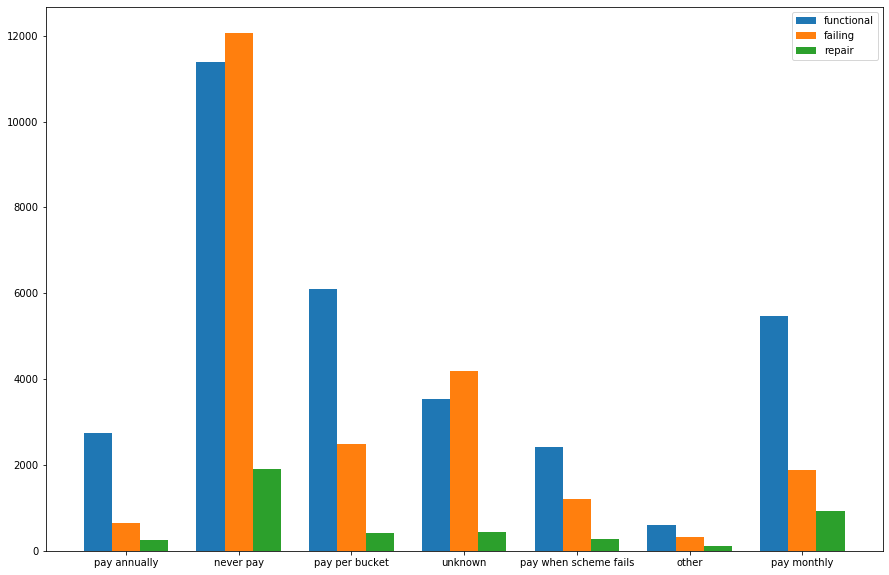

In [277]:
fig, ax = plt.subplots(figsize=(15, 10))

x_labels = payment_df.columns
y = payment_df.values
width = .25
x1 = np.arange(len(y[0]))
x2 = [x + width for x in x1]
x3 = [x + width for x in x2]
labels = payment_df.index
ax.bar(x1, y[0], label=labels[0], width=width)
ax.bar(x2, y[1], label=labels[1], width=width)
ax.bar(x3, y[2], label=labels[2], width=width)
plt.xticks([r + width for r in range(len(y[0]))], x_labels)
plt.legend()

That turned out pretty well, but since the classes are not equal between the different categories it's somewhat difficult to draw any useful information. I might try to use percentages but even then I'm not sure how great it would turn out since those are all so different as well. However, I think comparing functional pumps to failing pumps is going to be a little more valuable than those that need repairs, so this will still be valueable information. I want to turn the above code into a function now.

In [507]:
def plot_category(df, category):
    new_df = cat_df(df, category)

    fig, ax = plt.subplots(figsize=(15, 10))

    x_labels = new_df.columns
    y = new_df.values
    width = .25
    x1 = np.arange(len(y[0]))
    x2 = [x + width for x in x1]
    x3 = [x + width for x in x2]
    labels = new_df.index
    ax.bar(x1, y[0], label=labels[0], width=width)
    ax.bar(x2, y[1], label=labels[1], width=width)
    ax.bar(x3, y[2], label=labels[2], width=width)
    ax.set_title('Number of Pumps Per {} Category'.format(category.replace('_', ' ').title()), fontsize=18)
    ax.set_ylabel('Number of Pumps', fontsize=15)
    ax.set_xlabel('{} Categories'.format(category.replace('_', ' ').title()), fontsize=15)
    plt.xticks([r + width for r in range(len(y[0]))], x_labels)
    plt.legend()

    return new_df

,pay annually,never pay,pay per bucket,unknown,pay when scheme fails,other,pay monthly
functional,2740,11379,6090,3528,2429,611,5482
failing,655,12062,2486,4197,1208,325,1891
repair,247,1907,409,432,277,118,927


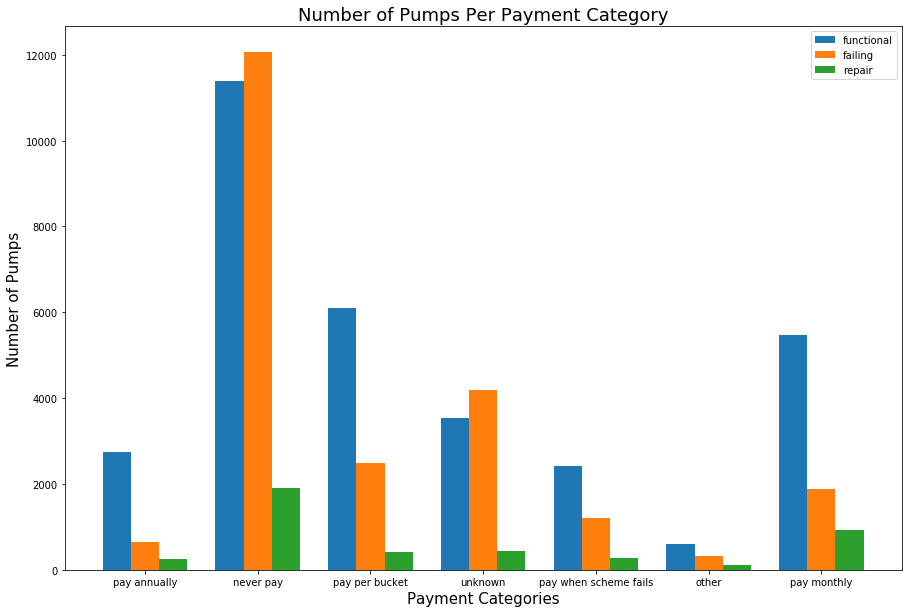

In [509]:
plot_category(df, 'payment')

### Model

At this point I want to try and use the information I have to create some sort of baseline model. I need to perform a train test split, fill the missing values, encode the categorical variables, and group together some of the categories in those variables before encoding. I am going to use the most general categories (source_class instead of source) for this first model. I also want to experiment with some regularization to see if any features could possibly be excluded from future models. 

## NOTE

Make sure you investigate the interactions between different variables when creating model iterations. Investigate relationships between categorical variables.

First thing I need to do is separate features and target variable and perform a train test split.

In [284]:
# target variable
y = df['status_group']
# features
X = df.drop('status_group', axis=1)

In [285]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = .2)

Now I want to make a subset of X_train, containing only the general features I want for this first model.

In [427]:
X_train_base = X_train.copy().drop(['wpt_name', 'num_private', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
                                        'ward', 'extraction_type', 'extraction_type_group', 'management', 'quality_group', 'quantity',
                                        'source', 'source_type', 'waterpoint_type', 'date_recorded', 'recorded_by'], axis=1)

In [428]:
X_train_base.isna().sum()

amount_tsh                  0
funder                   2876
gps_height                  0
installer                2889
longitude                   0
latitude                    0
basin                       0
population                  0
public_meeting           2689
scheme_management        3102
permit                   2439
construction_year           0
extraction_type_class       0
management_group            0
payment                     0
water_quality               0
quantity_group              0
source_class                0
waterpoint_type_group       0
dtype: int64

For the purposes of this baseline model, I am just going to fill the missing values with the 'most_frequent' value in the variable. To do this I will use SimpleImputer and impute those columns.

In [429]:
# Instantiate SimpleImputer object
# replace missing values with 'most_frequent'
impute = SimpleImputer(strategy='most_frequent')

In [430]:
# impute columns with missing values
X_train_base['funder'] = impute.fit_transform(np.array(X_train_base['funder']).reshape(-1, 1))
X_train_base['installer'] = impute.fit_transform(np.array(X_train_base['installer']).reshape(-1, 1))
X_train_base['public_meeting'] = impute.fit_transform(np.array(X_train_base['public_meeting']).reshape(-1, 1))
X_train_base['scheme_management'] = impute.fit_transform(np.array(X_train_base['scheme_management']).reshape(-1, 1))
X_train_base['permit'] = impute.fit_transform(np.array(X_train_base['permit']).reshape(-1, 1))

In [431]:
X_train_base.isna().sum()

amount_tsh               0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
basin                    0
population               0
public_meeting           0
scheme_management        0
permit                   0
construction_year        0
extraction_type_class    0
management_group         0
payment                  0
water_quality            0
quantity_group           0
source_class             0
waterpoint_type_group    0
dtype: int64

Great now all missing data is accounted for. Now before I can encode the categorical variables, I need to get rid of a few of the categories in the variables by grouping them together. For the variables that meet this requirement, all values other than the top 10 most frequent will be grouped into 'other'.

In [432]:
grouped_cat = []
for cat in X_train_base.columns:
    num_cats = len(X_train_base[cat].value_counts())
    if num_cats > 15:
        grouped_cat.append(cat)
grouped_cat

['amount_tsh',
 'funder',
 'gps_height',
 'installer',
 'longitude',
 'latitude',
 'population',
 'construction_year']

In [433]:
X_train_base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47520 entries, 3607 to 56422
Data columns (total 19 columns):
amount_tsh               47520 non-null float64
funder                   47520 non-null object
gps_height               47520 non-null int64
installer                47520 non-null object
longitude                47520 non-null float64
latitude                 47520 non-null float64
basin                    47520 non-null object
population               47520 non-null int64
public_meeting           47520 non-null object
scheme_management        47520 non-null object
permit                   47520 non-null object
construction_year        47520 non-null int64
extraction_type_class    47520 non-null object
management_group         47520 non-null object
payment                  47520 non-null object
water_quality            47520 non-null object
quantity_group           47520 non-null object
source_class             47520 non-null object
waterpoint_type_group    47520 non-null ob

I need to fix funder, installer, and scheme_management. Those are the only categorical columns with more than ten categories. I will create a function to do this.

In [434]:
def summarize_variable(df, cat, n):
    top_cats = df[cat].value_counts()[:(n-1)]
    new_cat = []
    for val in df[cat]:
        if val not in top_cats:
            new_cat.append('{}_other'.format(cat))
        else:
            new_cat.append(val)
    return new_cat

In [435]:
X_train_base['funder_grouped'] = summarize_variable(X_train_base, 'funder', 11)

In [436]:
X_train_base['funder_grouped'].value_counts()

funder_other              26640
Government Of Tanzania    10126
Danida                     2488
Hesawa                     1794
Rwssp                      1107
World Bank                 1076
Kkkt                       1047
World Vision               1008
Unicef                      845
Tasaf                       715
Dhv                         674
Name: funder_grouped, dtype: int64

That function works. Now I can do the same thing for installer and scheme_management.

In [437]:
X_train_base['installer_grouped'] = summarize_variable(X_train_base, 'installer', 11)
X_train_base['scheme_management_grouped'] = summarize_variable(X_train_base, 'scheme_management', 11)

In [438]:
X_train_base['installer_grouped'].value_counts()

installer_other       23498
DWE                   16833
Government             1422
RWE                     972
Commu                   850
DANIDA                  835
KKKT                    732
Hesawa                  682
0                       633
TCRS                    570
Central government      493
Name: installer_grouped, dtype: int64

In [439]:
X_train_base['scheme_management_grouped'].value_counts()

VWC                        32564
WUG                         4161
Water authority             2522
WUA                         2312
Water Board                 2175
Parastatal                  1346
Private operator             862
Company                      820
Other                        626
SWC                           75
scheme_management_other       57
Name: scheme_management_grouped, dtype: int64

Great, now I can drop the other columns and make a model with these grouped columns.

In [440]:
X_train_base.drop(['installer', 'funder', 'scheme_management'], axis=1, inplace=True)

In [441]:
X_train_base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47520 entries, 3607 to 56422
Data columns (total 19 columns):
amount_tsh                   47520 non-null float64
gps_height                   47520 non-null int64
longitude                    47520 non-null float64
latitude                     47520 non-null float64
basin                        47520 non-null object
population                   47520 non-null int64
public_meeting               47520 non-null object
permit                       47520 non-null object
construction_year            47520 non-null int64
extraction_type_class        47520 non-null object
management_group             47520 non-null object
payment                      47520 non-null object
water_quality                47520 non-null object
quantity_group               47520 non-null object
source_class                 47520 non-null object
waterpoint_type_group        47520 non-null object
funder_grouped               47520 non-null object
installer_grouped    

Now I need to OneHotEncode the categorical columns before creating my model. 

In [442]:
cat_vars = ['basin', 'public_meeting', 'permit', 'extraction_type_class', 'management_group',
            'payment', 'water_quality', 'quantity_group', 'source_class', 'waterpoint_type_group',
            'funder_grouped', 'installer_grouped', 'scheme_management_grouped']
num_vars = ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'population', 'construction_year']
# Instantiate OneHotEncoder
ohe = OneHotEncoder()
# fit to categorical data
ohe.fit(X_train_base[cat_vars])

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

Transform categorical variables, drop original ones from dataframe, and join encoded dataframe with numerical data.

In [443]:
encoded = ohe.fit_transform(X_train_base[cat_vars])

In [444]:
ohe_df = pd.DataFrame(encoded.todense(), columns=ohe.get_feature_names(), index=X_train_base.index)
ohe_df.head()

,x0_Internal,x0_Lake Nyasa,x0_Lake Rukwa,x0_Lake Tanganyika,x0_Lake Victoria,x0_Pangani,x0_Rufiji,x0_Ruvuma / Southern Coast,x0_Wami / Ruvu,x1_False,...,x12_Other,x12_Parastatal,x12_Private operator,x12_SWC,x12_VWC,x12_WUA,x12_WUG,x12_Water Board,x12_Water authority,x12_scheme_management_other
3607,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
50870,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
20413,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
52806,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [445]:
X_train_base.drop(cat_vars, axis=1, inplace=True)
X_train_base.head()

,amount_tsh,gps_height,longitude,latitude,population,construction_year
3607,50.0,2092,35.426020,-4.227446,160,1998
50870,0.0,0,35.510074,-5.724555,0,0
20413,0.0,0,32.499866,-9.081222,0,0
52806,0.0,0,34.060484,-8.830208,0,0
50091,300.0,1023,37.032690,-6.040787,120,1997


In [446]:
X_train_base = pd.concat([X_train_base, ohe_df], axis=1)
X_train_base.head()

,amount_tsh,gps_height,longitude,latitude,population,construction_year,x0_Internal,x0_Lake Nyasa,x0_Lake Rukwa,x0_Lake Tanganyika,...,x12_Other,x12_Parastatal,x12_Private operator,x12_SWC,x12_VWC,x12_WUA,x12_WUG,x12_Water Board,x12_Water authority,x12_scheme_management_other
3607,50.0,2092,35.426020,-4.227446,160,1998,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
50870,0.0,0,35.510074,-5.724555,0,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
20413,0.0,0,32.499866,-9.081222,0,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
52806,0.0,0,34.060484,-8.830208,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50091,300.0,1023,37.032690,-6.040787,120,1997,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [447]:
X_train_base.isna().sum()

amount_tsh                     0
gps_height                     0
longitude                      0
latitude                       0
population                     0
                              ..
x12_WUA                        0
x12_WUG                        0
x12_Water Board                0
x12_Water authority            0
x12_scheme_management_other    0
Length: 93, dtype: int64

Now I can create a baseline Logistic Regression model. I am assuming that whatever stakeholders would use this project would be more interested in identifying the pumps that are not working than the predictons being correct, so I will test the model with recall.

In [448]:
# instantiate Logistic Regression object
logreg = LogisticRegression(solver='liblinear')
# fit model
logreg.fit(X_train_base, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Since the classification problem has more than two classes, I need to change the average parameter in recall.

In [455]:
scorer = make_scorer(recall_score(average='weighted'))

TypeError: recall_score() missing 2 required positional arguments: 'y_true' and 'y_pred'

Well maybe cross_val_score isn't going to work for this case. Instead I am going to try a KFold object and manually calculate the average recall_score for ten splits

In [457]:
folds = KFold(n_splits=10, random_state=42)

I am going to iterate through the folds and calculate the recall score for each split. Then I will find the average for the ten splits.

In [483]:
train_pred = logreg.predict(X_train_base)

In [484]:
recall_score(y_train, train_pred, average='weighted')

0.7234217171717172

In [485]:
train_recall = []
val_recall = []
for train, val in folds.split(X_train_base):
    # make predictions
    train_preds = logreg.predict(X_train_base.iloc[train])
    val_pred = logreg.predict(X_train_base.iloc[val])

    # calculate scores and append to list
    train_recall.append(recall_score(y_train.iloc[train], train_preds, average='weighted'))
    val_recall.append(recall_score(y_train.iloc[val], val_pred, average='weighted'))

In [479]:
print('Avg training recall: {}'.format(np.mean(train_recall)))
print('Avg val recall: {}'.format(np.mean(val_recall)))

Avg training recall: 0.7234217171717171
Avg val recall: 0.7234217171717171


That's a great starting model. Over ten splits average recall score of .72 which I believe means that 72% of the time it correctly identified the pump. I now want to check accuracy and also a confusion matrix before moving onto model iterations.

In [487]:
accuracy_score(y_train, train_pred)

0.7234217171717172

Accuracy is exactly the same as recall. Part of me thinks that means I messed something up, but I am just going to go with it. .72 is pretty good for a first model.

In [491]:
cm = confusion_matrix(y_train, train_pred)

I am going to be creating quite a few confusion matrices, I want to create a function that plots them nicely so they are easier to intepret.

In [501]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    labels = ['Functional', 'Repair', 'Failing']
    cm_df = pd.DataFrame(cm, columns=labels, index=labels)
    return cm_df

In [502]:
plot_confusion_matrix(y_train, train_pred)

,Functional,Repair,Failing
Functional,23396,34,2372
Repair,2824,59,583
Failing,7282,48,10922


I just now realized I forgot to scale the numerical data! That is definitely something I will fix in when performing model iterations.

This will come in handy later. Now I want to export all of my functions to a .py file so I can use them later. I am going to create another notebook and proceed to model iterations.